In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('ngc3532.csv')
x = df['BP-RP']
y = df['Gmag']

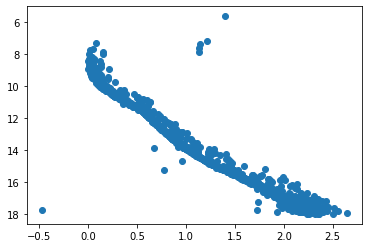

In [3]:
plt.scatter(x,y)
plt.gca().invert_yaxis()

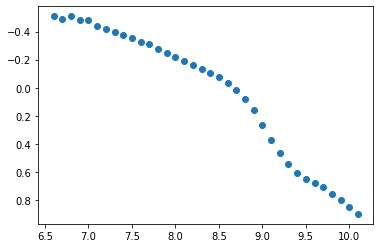

In [4]:
regressoes = pd.read_csv('../Regressoes_Isocronas_Gaia.txt')
plt.scatter(regressoes['Age'],regressoes['(BP-RP)TurnOff'])
plt.gca().invert_yaxis()

In [5]:
hm = np.linspace(np.min(regressoes['(BP-RP)TurnOff']),np.max(regressoes['(BP-RP)TurnOff']), 36)
n = hm[2]-hm[1]
n

0.04019999999999996

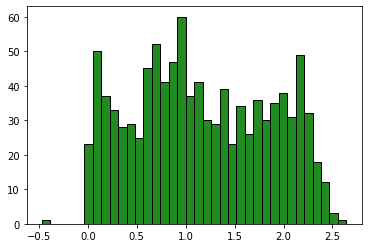

In [6]:
n = 0.04
n_bins = 36#len(np.arange(np.min(regressoes['(BP-RP)TurnOff']),np.max(regressoes['(BP-RP)TurnOff']), n))
cor = 'forestgreen'

fig, ax = plt.subplots()
cor = 'forestgreen'
mx, binsx, patches = ax.hist(x,n_bins, ec = 'k',color = cor)

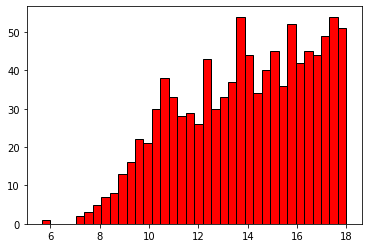

In [14]:
n = 0.04
n_bins = 36#len(np.arange(np.min(regressoes['(BP-RP)TurnOff']),np.max(regressoes['(BP-RP)TurnOff']), n))
cor = 'red'

fig, ax = plt.subplots()
my, binsy, patches = ax.hist(y,n_bins, ec = 'k',color = cor)

In [15]:
my,binsy

(array([ 1.,  0.,  0.,  0.,  2.,  3.,  5.,  7.,  8., 13., 16., 22., 21.,
        30., 38., 33., 28., 29., 26., 43., 30., 33., 37., 54., 44., 34.,
        40., 45., 36., 52., 42., 45., 44., 49., 54., 51.]),
 array([ 5.661717  ,  6.00438397,  6.34705094,  6.68971792,  7.03238489,
         7.37505186,  7.71771883,  8.06038581,  8.40305278,  8.74571975,
         9.08838672,  9.43105369,  9.77372067, 10.11638764, 10.45905461,
        10.80172158, 11.14438856, 11.48705553, 11.8297225 , 12.17238947,
        12.51505644, 12.85772342, 13.20039039, 13.54305736, 13.88572433,
        14.22839131, 14.57105828, 14.91372525, 15.25639222, 15.59905919,
        15.94172617, 16.28439314, 16.62706011, 16.96972708, 17.31239406,
        17.65506103, 17.997728  ]))

In [20]:
local = np.where(numero_pontos_mag==np.max(numero_pontos_mag))[0][0]
my[local],binsy[local]

(54.0, 13.54305736111111)

In [32]:
i = 11
my[i],binsy[i]

(22.0, 9.431053694444444)

In [27]:
#np.where(my==54) = 23,34
my[23],binsy[23]

(54.0, 13.54305736111111)

In [22]:
sorted(numero_pontos_mag, reverse = True)

[54,
 54,
 52,
 51,
 49,
 45,
 45,
 44,
 44,
 43,
 42,
 40,
 38,
 37,
 36,
 34,
 33,
 33,
 30,
 30,
 29,
 28,
 26,
 22,
 21,
 16,
 13,
 8,
 7,
 5,
 3,
 2,
 1,
 0,
 0,
 0]

In [8]:
numero_pontos_cor, cor = np.histogram(x,n_bins)
cor_turnoff = cor[np.where(numero_pontos_cor >= np.mean(numero_pontos_cor))[0][0]]

numero_pontos_mag, mag = np.histogram(y,n_bins)
mag_turnoff = mag[np.where(numero_pontos_mag==np.max(numero_pontos_mag))[0][0]]

In [34]:
cor_turnoff

0.049858100000000016

In [43]:
for i in range(len(x)):
    if x[i] <= cor_turnoff:
        break
i

16

In [61]:
locaisx = np.where(x<=cor_turnoff)[0]
locaisx

array([  16,   41,  109,  113,  135,  169,  215,  276,  306,  326,  344,
        365,  468,  484,  533,  631,  689,  759,  793,  824,  846,  879,
        960, 1005])

In [72]:
jpt = []
for element in locaisx:
    jpt.append(y[element])
jpt, len(jpt)

([9.091635,
  9.000129,
  8.276638,
  9.513949,
  8.677771,
  8.433761,
  9.240339,
  7.7768426,
  8.549279,
  8.1825075,
  8.334732,
  8.762342,
  8.197965,
  8.032592,
  9.140964,
  9.052667,
  8.603724,
  9.411492,
  8.5637045,
  8.981336,
  9.196883,
  9.434297,
  8.367846,
  17.76241],
 24)

In [93]:
final = []
media = np.mean(jpt)
desvio = np.std(jpt)
for element in jpt:
    if element < desvio + media and element > media - desvio:
        final.append(element)
len(final), np.mean(final)

(23, 8.731451982608696)

In [95]:
np.median(jpt), np.mean(jpt)

(8.7200565, 9.1077419)

In [107]:
bella = np.array(jpt)
def reject_outliers(data, m = 3.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m]
oi = reject_outliers(bella)
len(oi), np.mean(oi)

(23, 8.731451982608696)

In [108]:
teste = [5,5,6,7,20]
teste = [5,5,20]
np.median(teste), np.mean(teste)

(5.0, 10.0)

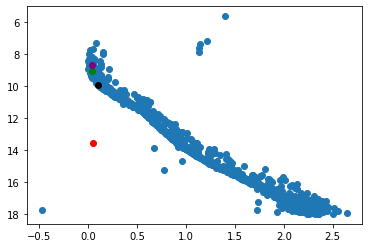

In [84]:
oi = pd.read_csv('regressao_ngc3532.csv')
plt.scatter(oi['TurnOffColor'],oi['TurnOffMag'], color = 'k', zorder = 100)
plt.scatter(x[i],y[i], color = 'green', zorder = 100)
plt.scatter(x[i],8.70,color = 'purple',zorder = 100)
plt.scatter(x,y)
plt.scatter(cor_turnoff,mag_turnoff, color = 'red')
plt.gca().invert_yaxis()

In [10]:
cor_turnoff,mag_turnoff

(0.049858100000000016, 13.54305736111111)

In [18]:
oi['TurnOffColor'].item(),oi['TurnOffMag'].item()

(0.10661602, 9.965724)